In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
main_data = pd.read_excel("C://Users//bhanu//Documents//summer intern//time_series_375_preprocess_en.xlsx")  #training data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 81 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     375 non-null    float64       
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

In [4]:
main_data.head()

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# In the data, one patient has different set of values - rows. but we can see that 
# only the first row has the patient ID and the rest of the cases have NaN as the value.
# All the rows should have the same patient id. we are recognising this with the help of admission
# date as the admission date will not change for different cases. to fill Nan values we use the preceding values.
main_data['PATIENT_ID'] = [i for i in range(1,len(main_data)+1)]
main_data

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,3,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,4,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,6116,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,6117,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,6118,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,6119,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# As there are different set of values for each patient we are choosing the value which is most recent. 
# to do this we group the patient id and with respect to the admission time and select the last row of each group
data_1 = main_data.sort_values('RE_DATE')
data_1 = data_1.sort_values('PATIENT_ID')
data_1


,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,3,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,4,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,6116,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,6117,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,6118,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,6119,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 6119
Data columns (total 81 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     6120 non-null   int64         
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

<AxesSubplot:>

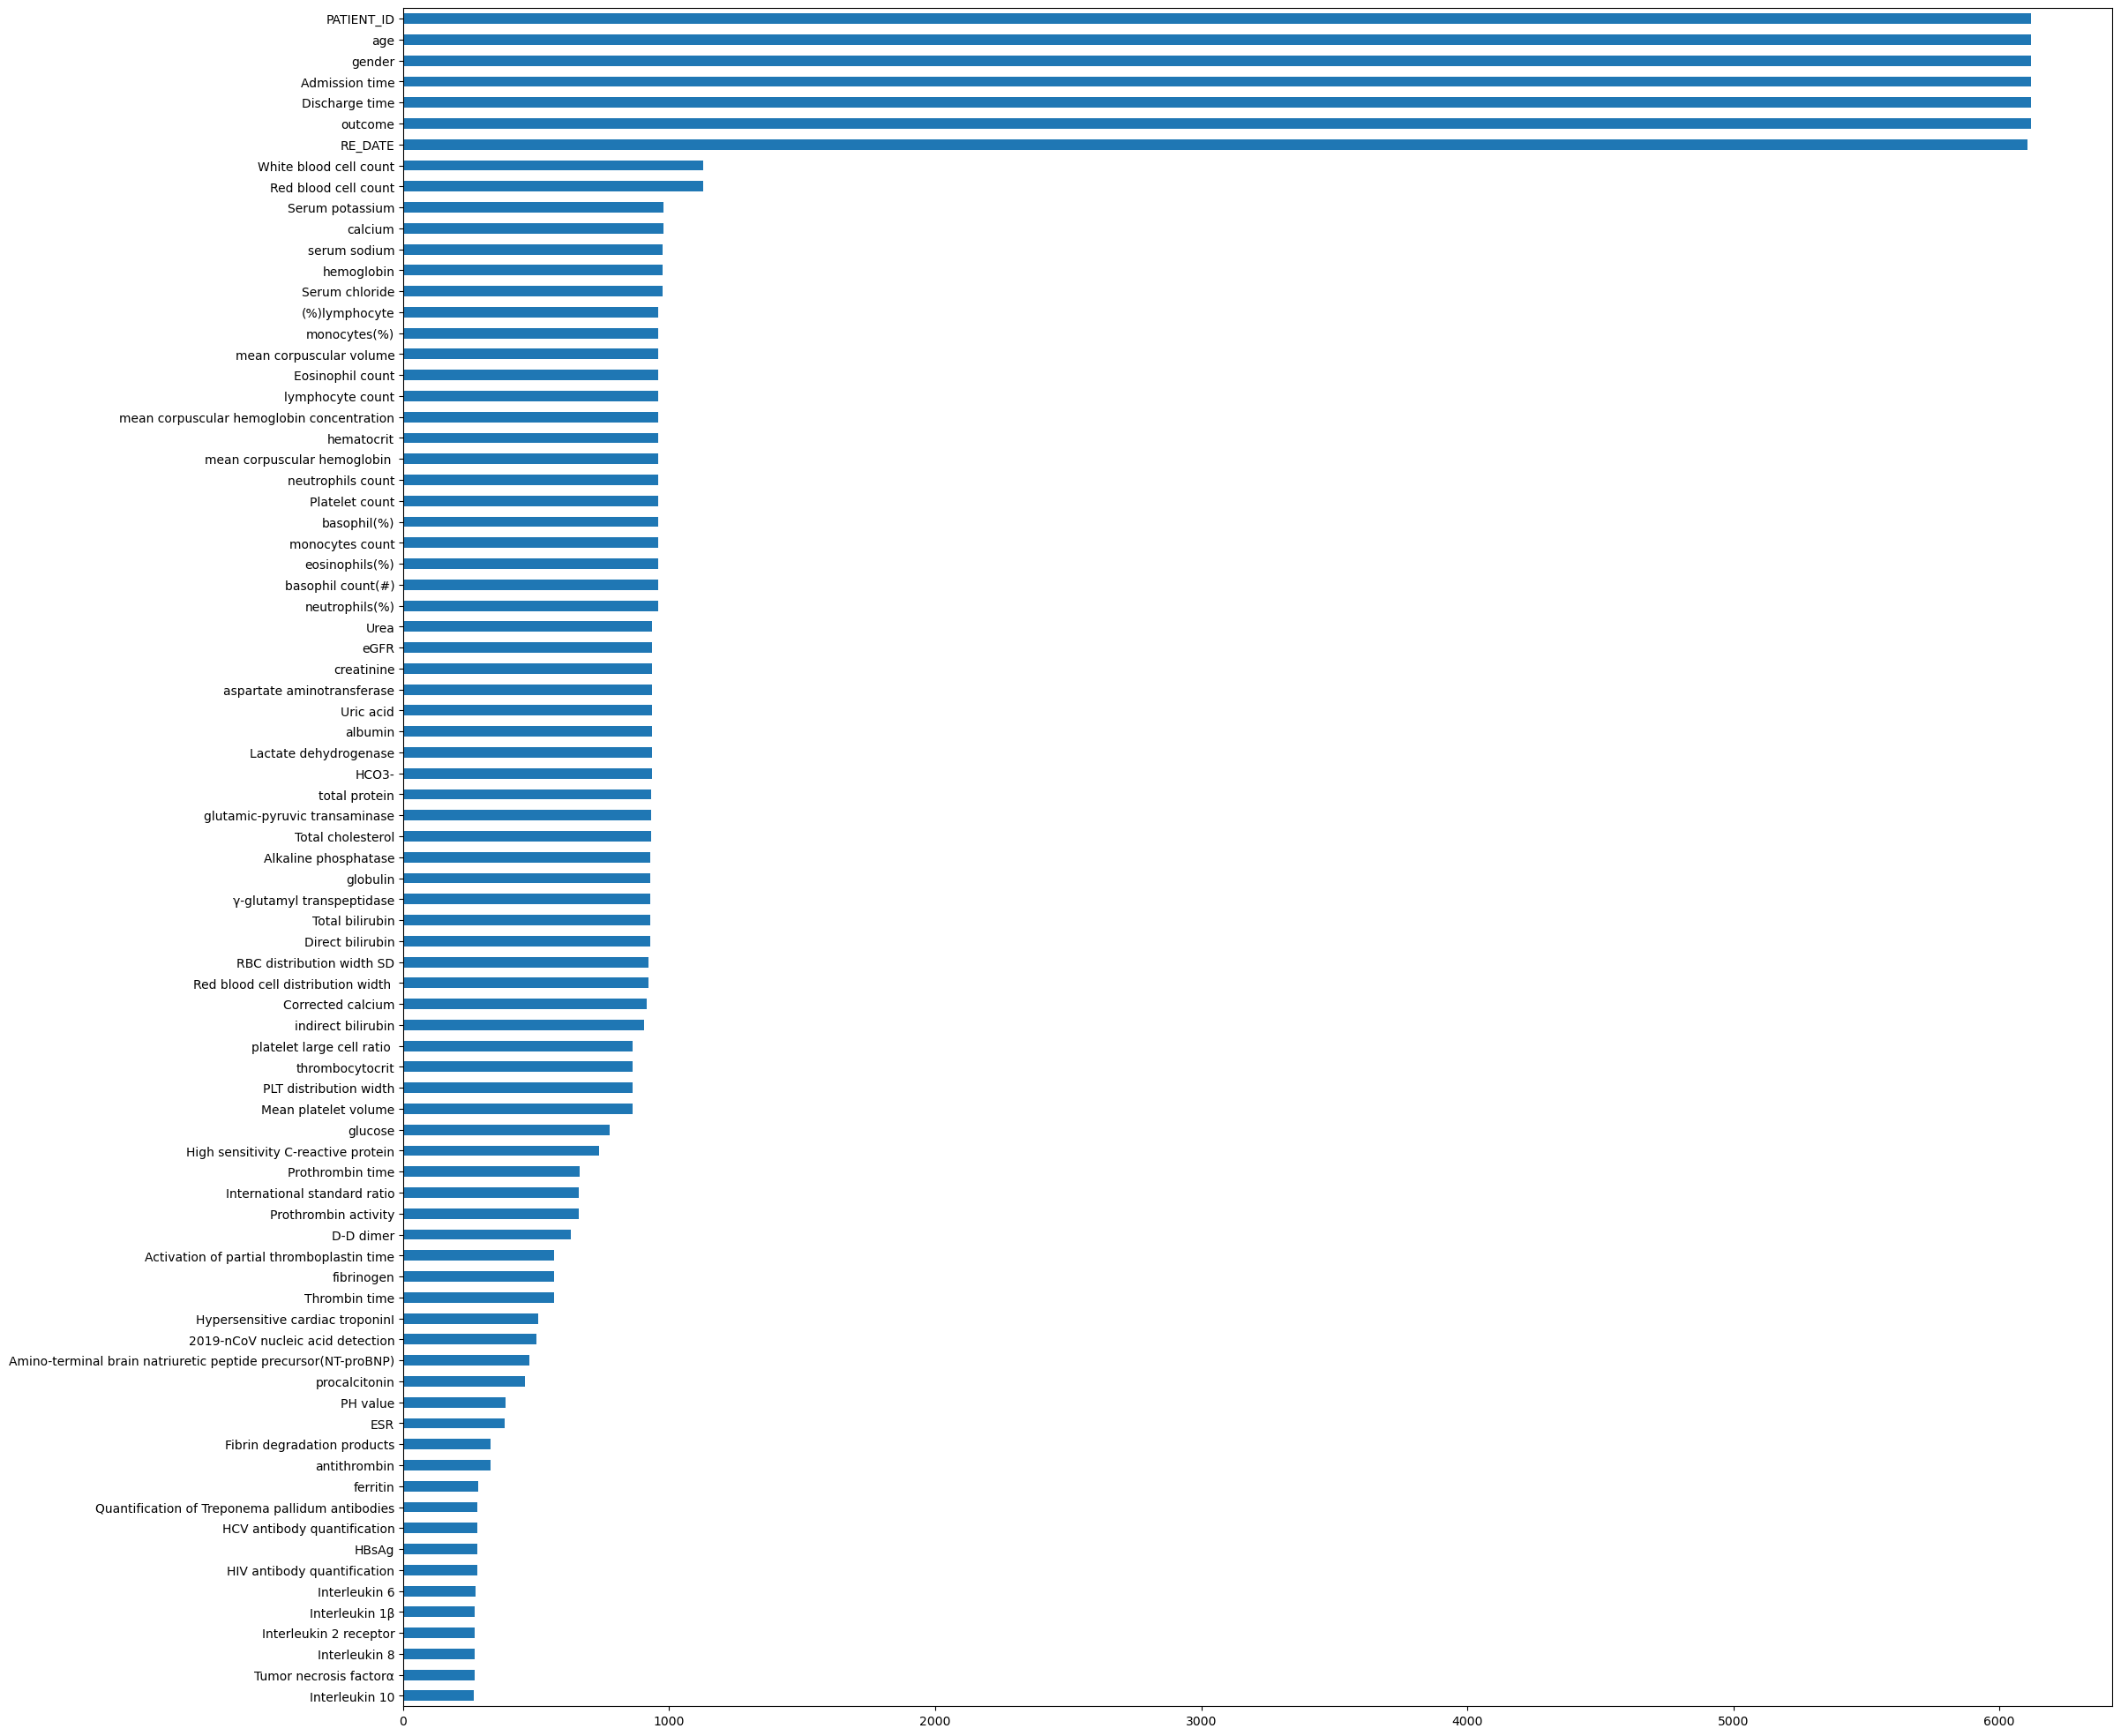

In [8]:
import numpy as np
data3 = data_1.notnull().sum()
data3.sort_values().plot(kind="barh",figsize = (25,25))

outcome
0    3215
1    2905
dtype: int64


<AxesSubplot:xlabel='outcome', ylabel='count'>

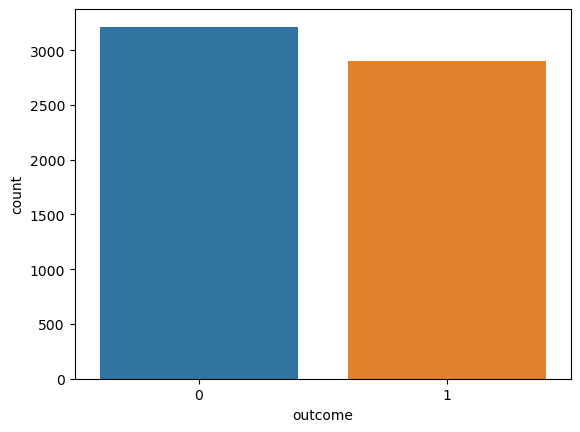

In [9]:
import seaborn as sns
print(data_1.groupby('outcome').size())
sns.countplot(x="outcome", data=data_1)

#### Load Test Data

##### Creating a new column time_in_hospital

In [10]:
data_1["time_in_hospital"] = (data_1['Discharge time']- data_1['Admission time']).dt.total_seconds()/(86400.0)
data_1["time_in_hospital"]

0       17.602338
1       17.602338
2       17.602338
3       17.602338
4       17.602338
          ...    
6115    10.088160
6116    10.088160
6117    10.088160
6118    10.088160
6119    10.088160
Name: time_in_hospital, Length: 6120, dtype: float64

In [11]:
test_data = pd.read_excel("C://Users//bhanu//Documents//summer intern//time_series_test_110_preprocess_en.xlsx")  #test data
test_data['PATIENT_ID'] = [i for i in range(1,len(test_data)+1)]
test_data

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,High sensitivity C-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,2,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,3,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,4,2020-02-13 10:06:00,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,5,2020-02-09 06:56:00,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0
...,...,...,...,...,...,...,...,...
752,753,2020-02-05 12:36:00,562.0,78.1,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0
753,754,2020-02-11 09:40:00,NaN,NaN,9.7,2020-02-05 00:27:57,2020-02-22 14:11:47,0
754,755,2020-02-11 10:04:00,438.0,NaN,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0
755,756,2020-02-17 10:00:00,430.0,31.2,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0


In [12]:
test_data = test_data.sort_values('RE_DATE')
test_data = test_data.sort_values('PATIENT_ID')
test_data.head()
test_data.shape

(757, 8)

<AxesSubplot:>

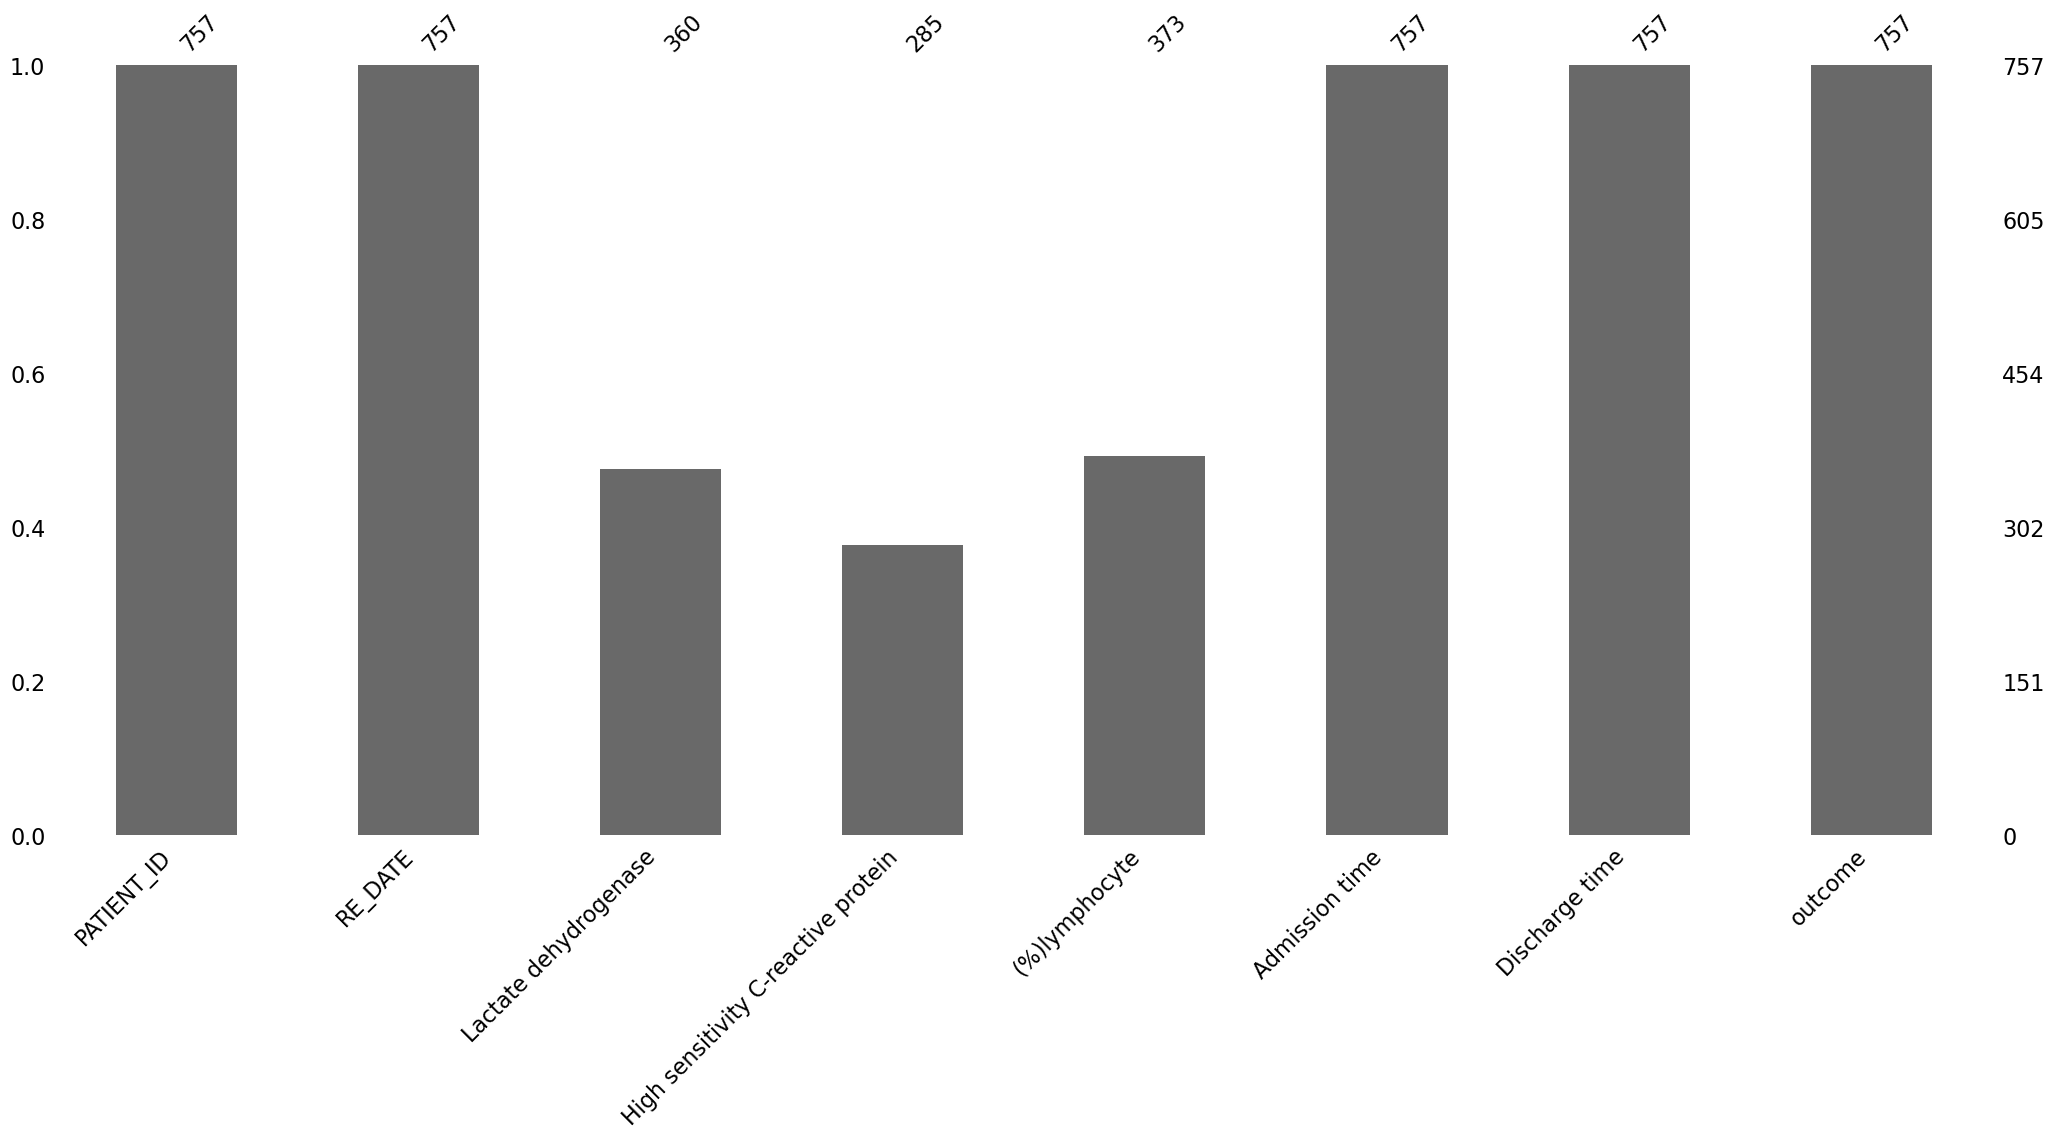

In [13]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(test_data)

###Imputing missing values with the median of their resepctive columns

In [14]:
test_data = test_data.fillna(test_data.median())
test_data

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\4175621566.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_data = test_data.fillna(test_data.median())


,PATIENT_ID,RE_DATE,Lactate dehydrogenase,High sensitivity C-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1,2020-02-10 11:15:00,258.0,9.1,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,2,2020-02-10 12:07:00,183.0,5.1,17.8,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,3,2020-02-13 09:35:00,258.0,9.1,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,4,2020-02-13 10:06:00,194.0,2.7,17.8,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,5,2020-02-09 06:56:00,258.0,9.1,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0
...,...,...,...,...,...,...,...,...
752,753,2020-02-05 12:36:00,562.0,78.1,17.8,2020-02-05 00:27:57,2020-02-22 14:11:47,0
753,754,2020-02-11 09:40:00,258.0,9.1,9.7,2020-02-05 00:27:57,2020-02-22 14:11:47,0
754,755,2020-02-11 10:04:00,438.0,9.1,17.8,2020-02-05 00:27:57,2020-02-22 14:11:47,0
755,756,2020-02-17 10:00:00,430.0,31.2,17.8,2020-02-05 00:27:57,2020-02-22 14:11:47,0


In [15]:
test_data["time_in_hospital"] = (test_data['Discharge time']- test_data['Admission time']).dt.total_seconds()/(86400.0)
test_data.dtypes


PATIENT_ID                                      int64
RE_DATE                                datetime64[ns]
Lactate dehydrogenase                         float64
High sensitivity C-reactive protein           float64
(%)lymphocyte                                 float64
Admission time                         datetime64[ns]
Discharge time                         datetime64[ns]
outcome                                         int64
time_in_hospital                              float64
dtype: object

In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 6119
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     6120 non-null   int64         
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

##  TEST 1: prediction using the same features as test data 

In [34]:
#taking the same data features as of test dataset
train_data = data_1[['PATIENT_ID','Admission time','Discharge time','outcome','High sensitivity C-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"time_in_hospital"]]
train_data = train_data.fillna(train_data.median())
train_data.shape
test_data = test_data[['PATIENT_ID','Admission time','Discharge time','outcome','High sensitivity C-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"time_in_hospital"]]

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\816518180.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data = train_data.fillna(train_data.median())


In [35]:
print("train_data types:\n",train_data.dtypes)
print("test_data types:\n",test_data.dtypes)
train_data.index = np.arange(1, len(train_data)+1)
train_data['PATIENT_ID']=train_data.index
test_data.index = np.arange(1, len(test_data)+1)
test_data['PATIENT_ID']=test_data.index


train_data types:
 PATIENT_ID                                      int64
Admission time                         datetime64[ns]
Discharge time                         datetime64[ns]
outcome                                         int64
High sensitivity C-reactive protein           float64
(%)lymphocyte                                 float64
Lactate dehydrogenase                         float64
time_in_hospital                              float64
dtype: object
test_data types:
 PATIENT_ID                                      int64
Admission time                         datetime64[ns]
Discharge time                         datetime64[ns]
outcome                                         int64
High sensitivity C-reactive protein           float64
(%)lymphocyte                                 float64
Lactate dehydrogenase                         float64
time_in_hospital                              float64
dtype: object


C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\94310345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PATIENT_ID']=test_data.index


## Decision Tree

In [19]:
features_column =  ['Lactate dehydrogenase', '(%)lymphocyte','High sensitivity C-reactive protein',"time_in_hospital"]
target_column = ['outcome']
Xtrain_data = train_data[features_column]
Ytrain_data = train_data[target_column]
Xtest_data = test_data[features_column]
Ytest_data = test_data[target_column]
model_DT = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
model_DT= model_DT.fit(Xtrain_data,Ytrain_data)
target_pred = model_DT.predict(Xtest_data)

#print(target_pred)
print("accuracy DT",metrics.accuracy_score(Ytest_data, target_pred))

accuracy DT 0.7807133421400264


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
model_RF = model_RF.fit(Xtrain_data,Ytrain_data)
target_pred_RF = model_RF.predict(Xtest_data)
print("accuracy RF",metrics.accuracy_score(Ytest_data, target_pred_RF))

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\2120585336.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = model_RF.fit(Xtrain_data,Ytrain_data)


accuracy RF 0.8441215323645971


## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
model_GB = GaussianNB()
model_GB = model_GB.fit(Xtrain_data,Ytrain_data)
target_pred_GB = model_GB.predict(Xtest_data)
print("accuracy SVM",metrics.accuracy_score(Ytest_data, target_pred_GB))

accuracy SVM 0.6142668428005285


C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_LR = LogisticRegression(solver='liblinear', random_state=0)
model_LR = model_LR.fit(Xtrain_data,Ytrain_data)
target_pred_LR = model_LR.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_LR)

C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8124174372523117

In [23]:
confusion_matrix(Ytest_data,target_pred_LR)

array([[482,   3],
       [139, 133]], dtype=int64)

# Support Vector Machines

In [24]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM  = model_SVM.fit(Xtrain_data,Ytrain_data)
target_pred_SVM = model_SVM.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_SVM)

C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.774108322324967

In [25]:
## for given test and train
acc_results = [(metrics.accuracy_score(Ytest_data, target_pred))*100,(metrics.accuracy_score(Ytest_data, target_pred_RF))*100,(metrics.accuracy_score(Ytest_data, target_pred_SVM))*100]
acc_results

[78.07133421400265, 84.4121532364597, 77.4108322324967]

#### The  graph below shows the accuracy using the different classification algorithms

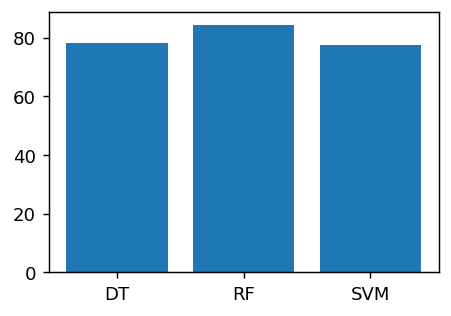

[78.07133421400265, 84.4121532364597, 77.4108322324967]


In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(3, 2), dpi=130)
ax = fig.add_axes([0,0,1,1])
langs = ['DT', 'RF','SVM']

ax.bar(langs,acc_results)
plt.show()
print(acc_results)

## Test 2: Models for train test split data - Biomarkers selected which truly determine the mortality

In [27]:
# training data for 7 selected biomarkers

train_data_new = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital']]

In [28]:
train_data_new.index = np.arange(1, len(train_data_new)+1)
train_data_new['PATIENT_ID']=train_data_new.index

train_data_new = train_data_new.fillna(train_data_new.mean())
train_data_new.head()

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\1263304710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_new['PATIENT_ID']=train_data_new.index
C:\Users\bhanu\AppData\Local\Temp\ipykernel_19868\1263304710.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data_new = train_data_new.fillna(train_data_new.mean())


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,time_in_hospital
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,184.310345,7.943413,1223.22998,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,105.000000,7.943413,1223.22998,0.800000,109.933761,3.540000,2.330000,9.589241,17.602338
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,184.310345,7.943413,1223.22998,1.016782,130.000000,15.599441,7.809582,8.500000,17.602338
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,184.310345,2.200000,1223.22998,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,184.310345,7.943413,19.90000,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338


In [29]:
features = ['PATIENT_ID','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital']
target = ['outcome']
X = train_data_new[features]
y = train_data_new[target]
X


,PATIENT_ID,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,time_in_hospital
1,1,-1.0,184.310345,7.943413,1223.22998,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338
2,2,-1.0,105.000000,7.943413,1223.22998,0.800000,109.933761,3.540000,2.330000,9.589241,17.602338
3,3,-1.0,184.310345,7.943413,1223.22998,1.016782,130.000000,15.599441,7.809582,8.500000,17.602338
4,4,-1.0,184.310345,2.200000,1223.22998,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338
5,5,-1.0,184.310345,7.943413,19.90000,1.016782,109.933761,15.599441,7.809582,9.589241,17.602338
...,...,...,...,...,...,...,...,...,...,...,...
6116,6116,-1.0,184.310345,7.943413,84.90000,1.016782,109.933761,15.599441,7.809582,9.589241,10.088160
6117,6117,-1.0,184.310345,7.943413,1223.22998,1.016782,109.933761,15.599441,7.809582,9.589241,10.088160
6118,6118,-1.0,184.310345,7.943413,1223.22998,1.016782,77.000000,15.599441,7.809582,9.800000,10.088160
6119,6119,-1.0,17.000000,7.943413,1223.22998,0.550000,109.933761,8.250000,7.570000,9.589241,10.088160


DT: 0.999837 (0.000490)
SVM: 0.999020 (0.001084)
RF: 1.000000 (0.000000)


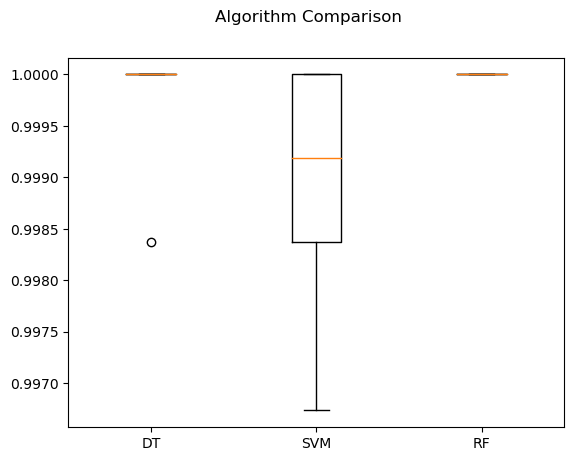

In [33]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = train_data_new[features]
Y = train_data_new[target].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# models.append(('LR',LogisticRegression()))
# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

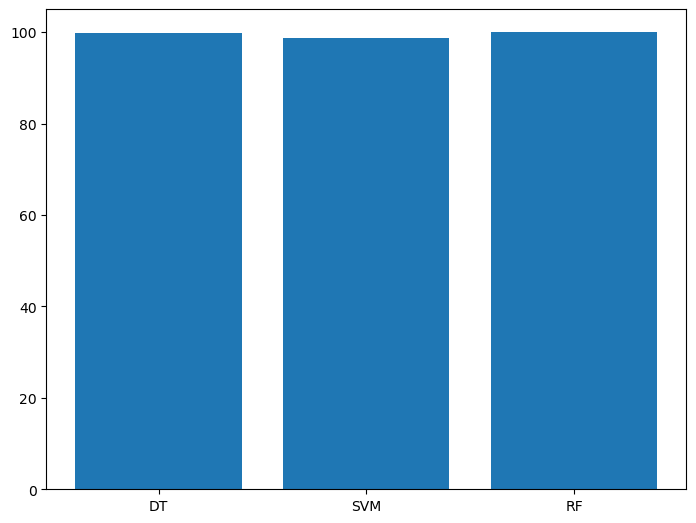

In [35]:
res = [99.7927,98.6558,100.0]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM','RF']

ax.bar(langs,res)
plt.show()

## Combined set


In [36]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 6119
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     6120 non-null   int64         
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

In [37]:

train_data_combined = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','High sensitivity C-reactive protein','(%)lymphocyte','Lactate dehydrogenase']]
train_data_combined.index = np.arange(1, len(train_data_combined)+1)
train_data_combined['PATIENT_ID']=train_data_combined.index
# train_data_combined = train_data_combined.fillna(train_data_combined.median())
train_data_combined.head()

C:\Users\bhanu\AppData\Local\Temp\ipykernel_8032\3131317564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_combined['PATIENT_ID']=train_data_combined.index


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,High sensitivity C-reactive protein,(%)lymphocyte,Lactate dehydrogenase
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,105.0,NaN,NaN,0.8,NaN,3.54,2.33,NaN,NaN,22.6,NaN
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,8.5,43.1,NaN,306.0
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
train_data_combined["time_in_hospital"] = pd.to_numeric(train_data_combined['Discharge time']- train_data_combined['Admission time'])
train_data_new.dtypes
values4 = {'2019-nCoV nucleic acid detection':train_data_combined['2019-nCoV nucleic acid detection'].median(),'Platelet count':train_data_combined['Platelet count'].median(),'D-D dimer':train_data_combined['D-D dimer'].median(),'Hypersensitive cardiac troponinI':train_data_combined['Hypersensitive cardiac troponinI'].median(),'lymphocyte count':train_data_combined['lymphocyte count'].median(),'creatinine':train_data_combined['creatinine'].median(),'White blood cell count':train_data_combined['White blood cell count'].median(),'neutrophils count':train_data_combined['neutrophils count'].median(),'Urea':train_data_combined['Urea'].median(),'High sensitivity C-reactive protein':train_data_combined['High sensitivity C-reactive protein'].median(),'(%)lymphocyte':train_data_combined['(%)lymphocyte'].median(),'Lactate dehydrogenase':train_data_combined['Lactate dehydrogenase'].median()}
train_data_combined = train_data_combined.fillna(value = values4)
train_data_combined.head()

C:\Users\bhanu\AppData\Local\Temp\ipykernel_8032\1449270196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_combined["time_in_hospital"] = pd.to_numeric(train_data_combined['Discharge time']- train_data_combined['Admission time'])


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,High sensitivity C-reactive protein,(%)lymphocyte,Lactate dehydrogenase,time_in_hospital
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,20.6,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,105.0,2.155,20.6,0.8,76.0,3.54,2.33,5.985,51.5,22.60,340.0,1520842000000000
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,20.6,0.8,130.0,7.72,5.85,8.500,43.1,11.45,306.0,1520842000000000
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.200,20.6,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,19.9,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000


In [39]:
features2 = ['PATIENT_ID','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital','Lactate dehydrogenase', '(%)lymphocyte','High sensitivity C-reactive protein']
target2 = ['outcome']
X2 = train_data_combined[features2]
y2 = train_data_combined[target2]

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)

DT: 0.999837 (0.000490)
SVM: 0.766993 (0.018036)
RF: 1.000000 (0.000000)


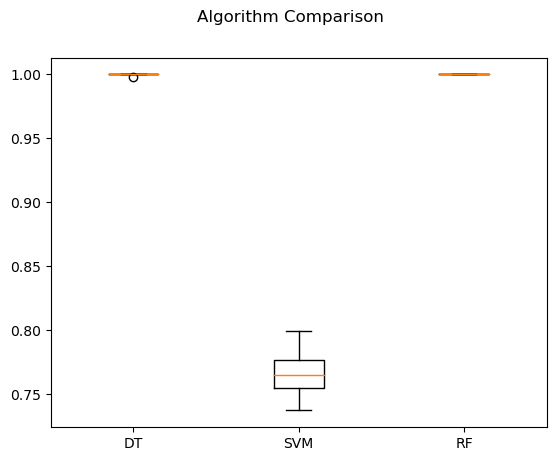

In [55]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
X = train_data_combined[features2]
Y = train_data_combined[target2].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

### The accuracy we get by implementing all the classification algortithms by using all the attributes present in the dataset

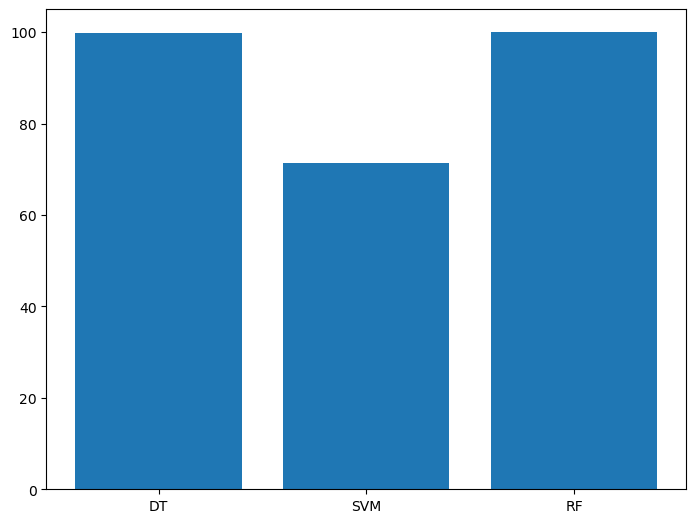

In [131]:
qw = [99.7297, 71.4225,100.00]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM','RF']

ax.bar(langs,qw)
plt.show()

### RQ 2

### Feature Selection using XGBoost

In [42]:
# feature selection from all the biomarkers
feature = ['Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase',
       'albumin', 'basophil(%)', 'Interleukin 10', 'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8',
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume', 'ferritin', 'RBC distribution width SD',
       'Thrombin time', '(%)lymphocyte', 'HCV antibody quantification',
       'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase',
       'Uric acid', 'HCO3-', 'calcium',
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
       'Lactate dehydrogenase', 'platelet large cell ratio ', 'Interleukin 6',
       'Fibrin degradation products', 'monocytes count',
       'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase',
       'International standard ratio', 'basophil count(#)',
       '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ',
       'Activation of partial thromboplastin time',
       'High sensitivity C-reactive protein', 'HIV antibody quantification',
       'serum sodium', 'thrombocytocrit', 'ESR',
       'glutamic-pyruvic transaminase', 'eGFR', 'creatinine']
outcome = ['outcome']
Xdata = data_1[feature]
Ydata = data_1[outcome]
Xdata = Xdata.fillna(Xdata.median())
Xdata.head()

,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,20.6,125.0,102.1,14.8,0.10,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0
1,20.6,136.0,102.1,14.8,0.10,0.6,676.5,69.5,32.2,0.3,...,31.9,39.2,51.5,0.09,140.4,0.12,28.0,24.0,87.9,76.0
2,20.6,125.0,103.1,14.8,0.10,0.1,676.5,46.0,33.3,0.2,...,30.9,39.2,43.1,0.09,137.7,0.21,28.0,16.0,46.6,130.0
3,20.6,125.0,102.1,13.9,0.10,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0
4,19.9,125.0,102.1,14.8,0.09,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0


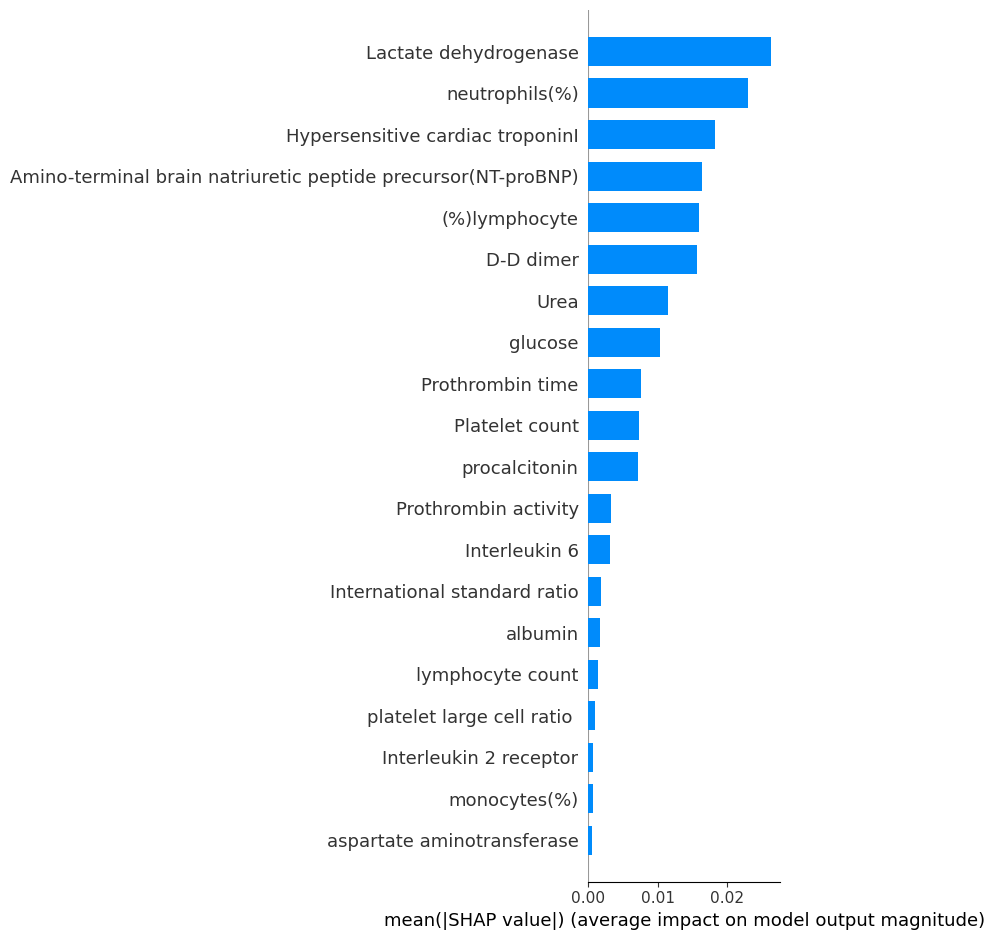

In [43]:
!pip install xgboost
!pip install shap
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xdata, label=Ydata), 100)
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xdata)
shap.summary_plot(shap_values, Xdata, plot_type="bar")

### Prediction using top 10 features from XGBoost feature selection model

In [44]:
fs = ['Lactate dehydrogenase','neutrophils(%)','High sensitivity C-reactive protein','Amino-terminal brain natriuretic peptide precursor(NT-proBNP)','(%)lymphocyte','D-D dimer','Urea','glucose','Prothrombin time','Platelet count','procalcitonin']
ts = ['outcome']
Xs = Xdata[fs]
Ys = Ydata[ts]
Xs.head()

,Lactate dehydrogenase,neutrophils(%),High sensitivity C-reactive protein,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),(%)lymphocyte,D-D dimer,Urea,glucose,Prothrombin time,Platelet count,procalcitonin
0,340.0,82.4,51.5,585.0,11.45,2.155,5.985,6.99,14.8,178.0,0.10
1,340.0,65.8,51.5,585.0,22.60,2.155,5.985,6.99,14.8,105.0,0.10
2,306.0,82.4,43.1,585.0,11.45,2.155,8.500,6.99,14.8,178.0,0.10
3,340.0,82.4,51.5,585.0,11.45,2.200,5.985,6.99,13.9,178.0,0.10
4,340.0,82.4,51.5,60.0,11.45,2.155,5.985,7.35,14.8,178.0,0.09


#### Decision Tree, Random Forest and SVM model validation using Cross Validation

DT: 0.740196 (0.014245)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

SVM: 0.624510 (0.025699)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

RF: 0.756863 (0.015515)


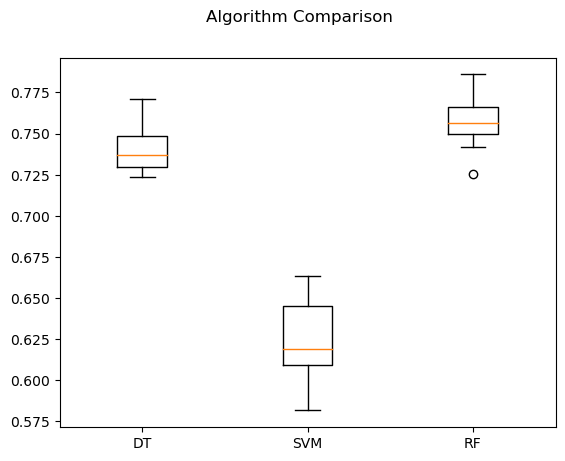

In [45]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data
Xs = Xdata[fs]
Ys = Ydata[ts]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, Xs, Ys, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

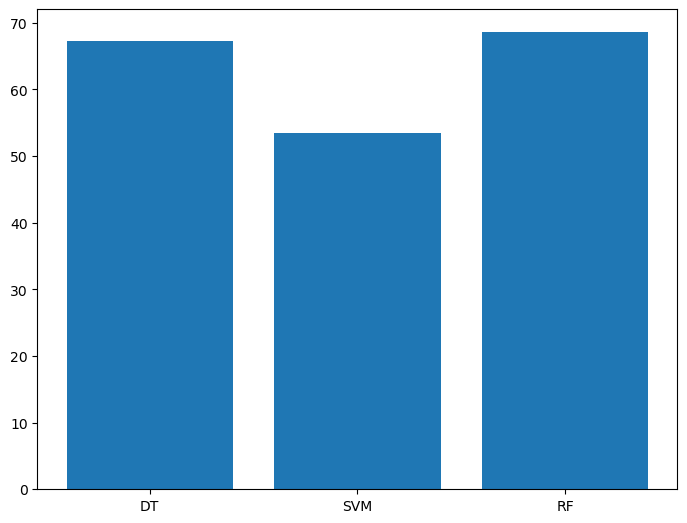

In [138]:
r = [67.2546,53.3926,68.5917]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM', 'RF']

ax.bar(langs,r)
plt.show()